In [21]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, average_precision_score

In [22]:
labels = 'Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices'.split(',')
labels = np.array(labels)

In [23]:
preds = pickle.load(open('predictions.pkl', 'rb'))
hist = pickle.load(open('train_hist.pkl', 'rb'))

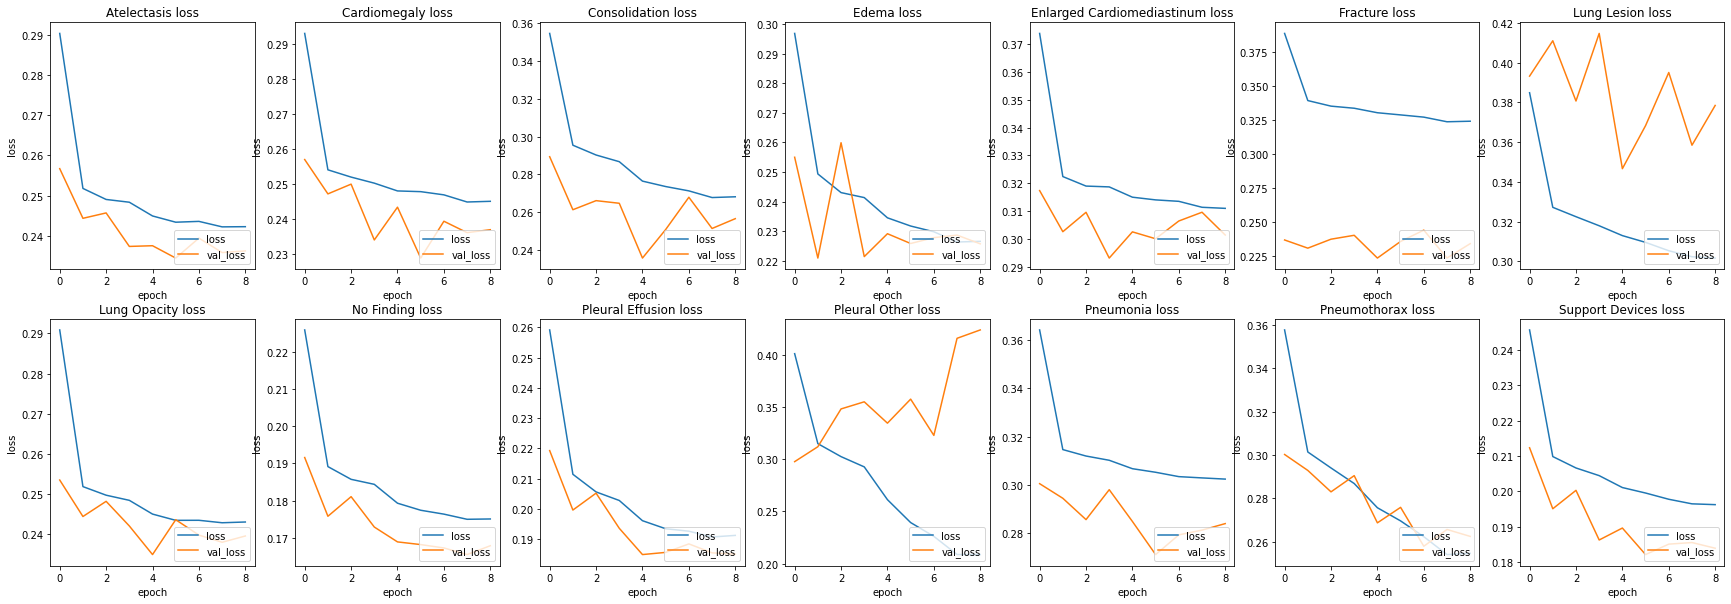

In [24]:
# Loss Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    loss = hist[f'{label_name}_loss']
    val_loss = hist[f'val_{label_name}_loss']
    title = f'{lab} loss'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(loss, label='loss')
    ax[x, y].plot(val_loss, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('loss')
    
    


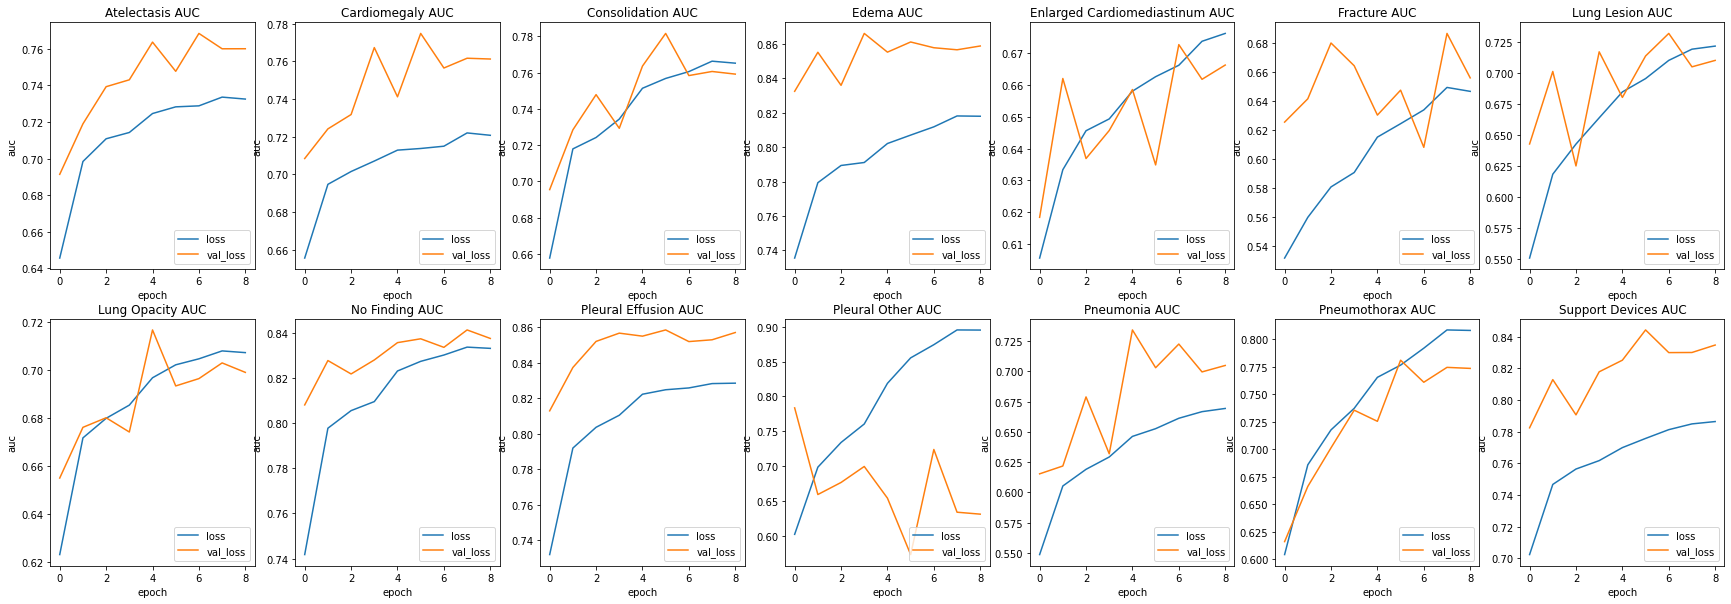

In [25]:
# ROC AUC Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    auc = hist[f'{label_name}_auc']
    val_auc = hist[f'val_{label_name}_auc']
    title = f'{lab} AUC'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(auc, label='loss')
    ax[x, y].plot(val_auc, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('auc')

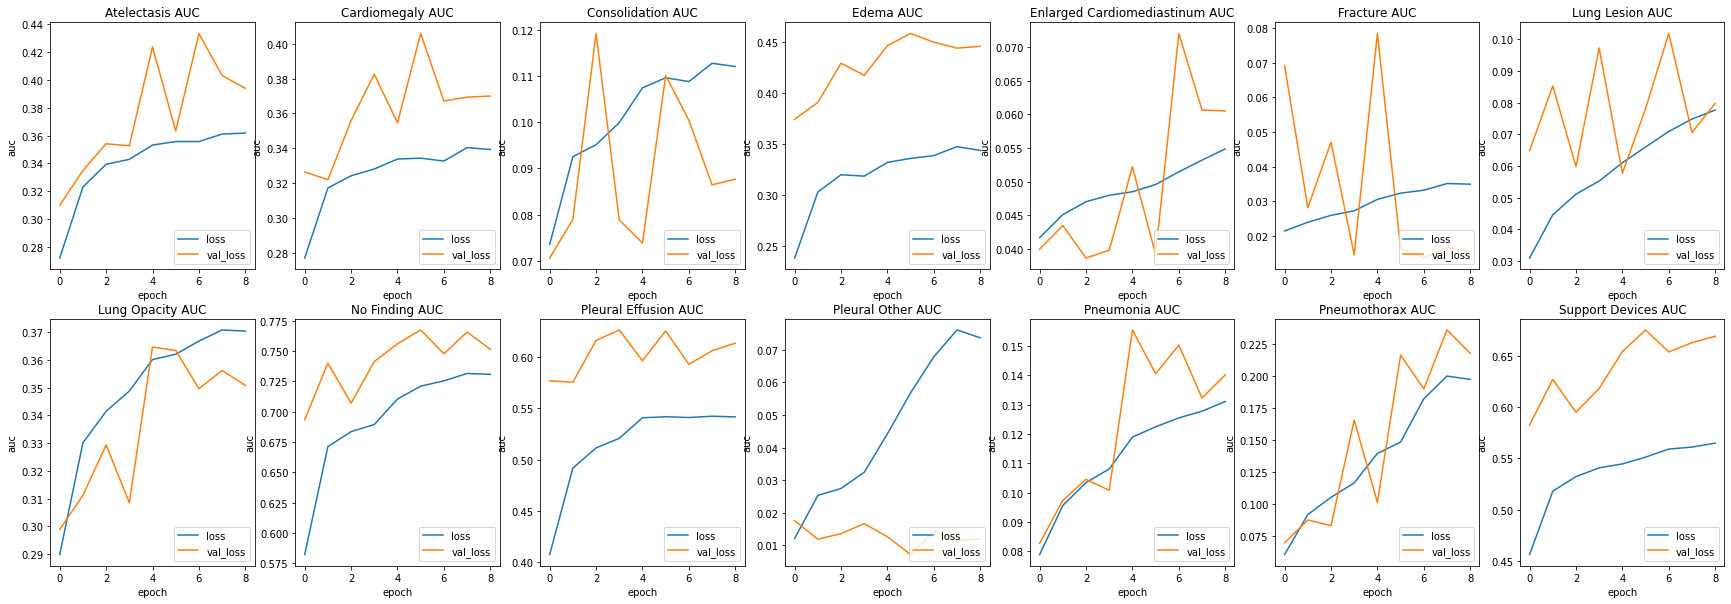

In [26]:
# PR AUC Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    label_name = "".join(lab.split(" ")).lower()
    auc = hist[f'{label_name}_auc_1']
    val_auc = hist[f'val_{label_name}_auc_1']
    title = f'{lab} AUC'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(auc, label='loss')
    ax[x, y].plot(val_auc, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('auc')

In [27]:
preds = np.array(preds)

In [28]:
preds.shape

(14, 3403, 1)

In [29]:
shaped = preds.T[0]

In [30]:
shaped.shape

(3403, 14)

In [31]:
test = pd.read_csv('../../../../processed_splits/test.csv')

In [32]:
results = pd.DataFrame(shaped, columns=['pred_' + x for x in labels])

In [33]:
merged = pd.concat([test, results], axis=1)

In [34]:
merged.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Enlarged Cardiomediastinum,pred_Fracture,pred_Lung Lesion,pred_Lung Opacity,pred_No Finding,pred_Pleural Effusion,pred_Pleural Other,pred_Pneumonia,pred_Pneumothorax,pred_Support Devices
0,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.469266,0.489104,0.468841,0.448096,0.538449,0.330367,0.373732,0.460225,0.402847,0.446994
1,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.470288,0.488115,0.468848,0.439767,0.545450,0.315172,0.371076,0.452948,0.416591,0.453806
2,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.503814,0.531912,0.523387,0.498641,0.478597,0.459099,0.527807,0.500793,0.533648,0.492336
3,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.484894,0.509532,0.526620,0.449287,0.534481,0.344000,0.466974,0.460629,0.483004,0.449244
4,10046166,56173345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.520505,0.495639,0.485438,0.500342,0.472170,0.497747,0.443790,0.492584,0.504121,0.537422


In [35]:
fpr = {}
tpr = {}
auc = {}
for lab in labels:
    ytrue = merged[lab]
    ypred = merged['pred_'+lab]
    tfpr, ttpr, _ = roc_curve(ytrue, ypred)
    tauc = roc_auc_score(ytrue, ypred)
    fpr[lab] = tfpr
    tpr[lab] = ttpr
    auc[lab] = tauc


In [36]:
auc

{'Atelectasis': 0.7001397681574608,
 'Cardiomegaly': 0.6987550928827854,
 'Consolidation': 0.7039280666120277,
 'Edema': 0.7885108942517168,
 'Enlarged Cardiomediastinum': 0.6438360719035565,
 'Fracture': 0.6597704615725912,
 'Lung Lesion': 0.6772301710809273,
 'Lung Opacity': 0.6569517047362785,
 'No Finding': 0.7706074630246934,
 'Pleural Effusion': 0.8135360034187222,
 'Pleural Other': 0.8474004372207965,
 'Pneumonia': 0.624122854779331,
 'Pneumothorax': 0.7591805766312595,
 'Support Devices': 0.7919805975636953}

In [37]:
# Overall Average Precision Score 
aps_macro = {}
for lab in labels:
    ytrue = merged[lab]
    ypred = merged['pred_'+lab]
    taps = average_precision_score(ytrue, ypred, average='macro') # weighted and macro provide similar results
    aps_macro[lab] = taps

aps_macro

{'Atelectasis': 0.38975509793693197,
 'Cardiomegaly': 0.40459262874225227,
 'Consolidation': 0.12199634465491686,
 'Edema': 0.4746718961554023,
 'Enlarged Cardiomediastinum': 0.06902804519885383,
 'Fracture': 0.05388161086056074,
 'Lung Lesion': 0.064193755242209,
 'Lung Opacity': 0.45247661400200256,
 'No Finding': 0.484493383554459,
 'Pleural Effusion': 0.6271158507060988,
 'Pleural Other': 0.0793804239724488,
 'Pneumonia': 0.16171549488576853,
 'Pneumothorax': 0.09506068079734362,
 'Support Devices': 0.661051520780422}

In [38]:
merged.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Enlarged Cardiomediastinum,pred_Fracture,pred_Lung Lesion,pred_Lung Opacity,pred_No Finding,pred_Pleural Effusion,pred_Pleural Other,pred_Pneumonia,pred_Pneumothorax,pred_Support Devices
0,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.469266,0.489104,0.468841,0.448096,0.538449,0.330367,0.373732,0.460225,0.402847,0.446994
1,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.470288,0.488115,0.468848,0.439767,0.545450,0.315172,0.371076,0.452948,0.416591,0.453806
2,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.503814,0.531912,0.523387,0.498641,0.478597,0.459099,0.527807,0.500793,0.533648,0.492336
3,10046166,53492798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.484894,0.509532,0.526620,0.449287,0.534481,0.344000,0.466974,0.460629,0.483004,0.449244
4,10046166,56173345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.520505,0.495639,0.485438,0.500342,0.472170,0.497747,0.443790,0.492584,0.504121,0.537422


In [39]:
for lab in labels:
    print(merged[lab].value_counts())

0.0    2639
1.0     764
Name: Atelectasis, dtype: int64
0.0    2507
1.0     896
Name: Cardiomegaly, dtype: int64
0.0    3192
1.0     211
Name: Consolidation, dtype: int64
0.0    2677
1.0     726
Name: Edema, dtype: int64
0.0    3260
1.0     143
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    3316
1.0      87
Name: Fracture, dtype: int64
0.0    3282
1.0     121
Name: Lung Lesion, dtype: int64
0.0    2305
1.0    1098
Name: Lung Opacity, dtype: int64
0.0    2809
1.0     594
Name: No Finding, dtype: int64
0.0    2308
1.0    1095
Name: Pleural Effusion, dtype: int64
0.0    3340
1.0      63
Name: Pleural Other, dtype: int64
0.0    3061
1.0     342
Name: Pneumonia, dtype: int64
0.0    3295
1.0     108
Name: Pneumothorax, dtype: int64
0.0    2192
1.0    1211
Name: Support Devices, dtype: int64


In [40]:
merged.to_csv('results_focal_loss.csv', index=False)

In [41]:
train = pd.read_csv('../../../../processed_splits/train.csv')

In [42]:
for lab in labels:
    print(train[lab].value_counts())

0.0    190331
1.0     47631
Name: Atelectasis, dtype: int64
0.0    191587
1.0     46375
Name: Cardiomegaly, dtype: int64
0.0    226731
1.0     11231
Name: Consolidation, dtype: int64
0.0    209621
1.0     28341
Name: Edema, dtype: int64
0.0    230506
1.0      7456
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    233286
1.0      4676
Name: Fracture, dtype: int64
0.0    231526
1.0      6436
Name: Lung Lesion, dtype: int64
0.0    184707
1.0     53255
Name: Lung Opacity, dtype: int64
0.0    158076
1.0     79886
Name: No Finding, dtype: int64
0.0    181841
1.0     56121
Name: Pleural Effusion, dtype: int64
0.0    235957
1.0      2005
Name: Pleural Other, dtype: int64
0.0    221205
1.0     16757
Name: Pneumonia, dtype: int64
0.0    226916
1.0     11046
Name: Pneumothorax, dtype: int64
0.0    166514
1.0     71448
Name: Support Devices, dtype: int64
